This is a test notebook for the MaskRCNN ROS interface. Select 'Cells' -> 'Run All' in the menu above.

In [1]:
# Copyright 2018 Edge Case Research, LLC

import random

import rospy
import rosbag
import actionlib

from PIL import Image as pil
from matplotlib.pyplot import imshow
%matplotlib inline

import tut_common_msgs.msg
from ros_utils import *

bag = rosbag.Bag('./samples/test.bag', 'r')
image_topic = '/input_image'

rospy.init_node("actionlib_client_test")

client = actionlib.SimpleActionClient('/sut/check_for_objects', tut_common_msgs.msg.CheckForObjectsAction)

print("Waiting for server...")
client.wait_for_server()
print("Server is online!")

msgs = []

for topic, msg, t in bag.read_messages(topics=[image_topic]):
    msgs.append(msg)

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Waiting for server...
Server is online!


Choose a random message and send it to the server. Re-run this cell to see other outputs.

Sending message 17 of 25


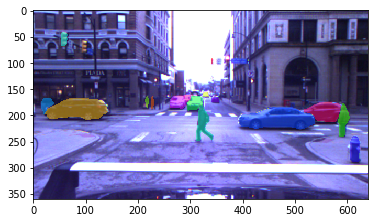

In [3]:
randind = random.randint(0,len(msgs))
msg = msgs[randind]
print("Sending message {} of {}".format(randind, len(msgs)))

goal = tut_common_msgs.msg.CheckForObjectsGoal()
goal.id = randind
goal.image = msg

client.send_goal(goal)

client.wait_for_result()

r = client.get_result()

[colored_im, _] = convertImgMsgToNumpy(r.image)
im = pil.fromarray(colored_im)
imshow(im)

#print(r.boundingBoxes)